In [50]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:
data = np.genfromtxt('data.txt', delimiter=',')

In [52]:
t, x = data[:, 0], data[:, 1]

In [53]:
t = t.reshape((-1, 1))

In [54]:
t_train, t_test, x_train, x_test = train_test_split(t, x, test_size=1/3, random_state=27)

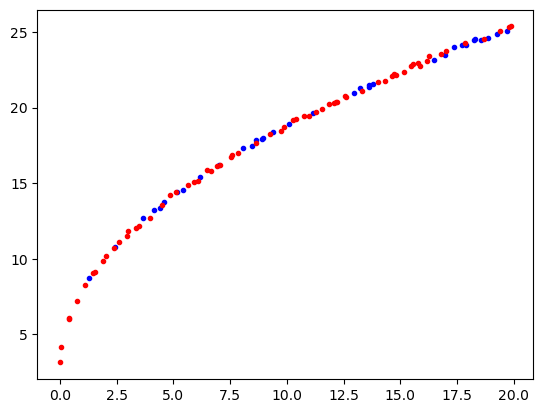

In [55]:
plt.plot(t_test, x_test, 'b.');
plt.plot(t_train, x_train, 'r.');

In [74]:
rfr = RandomForestRegressor(5000, random_state=71).fit(t_train, x_train)

In [75]:
rfr.score(t_test, x_test)

0.998446926315731

In [76]:
t_values = np.linspace(0.0, 20.0, 100)
x_values = rfr.predict(t_values.reshape((-1, 1)))

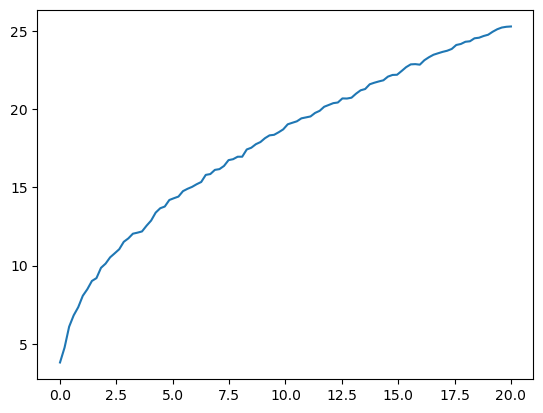

In [77]:
plt.plot(t_values, x_values);

In [66]:
sr = SymbolicRegressor(population_size=5000,
                       generations=20,
                       stopping_criteria=0.01,
                       p_crossover=0.7,
                       p_subtree_mutation=0.1,
                       p_hoist_mutation=0.05,
                       p_point_mutation=0.1,
                       max_samples=0.9, verbose=1,
                       parsimony_coefficient=0.01,
                       function_set=['add', 'sub', 'mul', 'div',
                                     'sqrt', 'log', 'neg', 'inv'],
                       random_state=79)

In [67]:
sr.fit(t_train, x_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.67          329.362       38          1.35034          1.30924     33.80s
   1    15.31          285.748       30          0.89953          1.14421     32.22s
   2    18.52          4266.27       29         0.675487         0.594339     31.57s
   3    25.31          59.7686       27         0.516444         0.254353     32.74s
   4    26.77          72.6178       17         0.452379         0.367571     33.86s
   5    26.82          84.1985       31           0.2052        0.0843382     28.56s
   6    25.55          15.3484       22         0.144599         0.423604     26.07s
   7    21.78          13.9815       42         0.130762         0.517622     23.06s
   8    23.18          11.1472       39         0.125484         0.108024  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'neg', 'inv'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=79, stopping_criteria=0.01, verbose=1)

In [68]:
sr.score(t_test, x_test)

0.999265968298934

In [69]:
st_values = np.linspace(0.0, 20.0, 100).reshape((-1, 1))
sx_values = sr.predict(st_values)

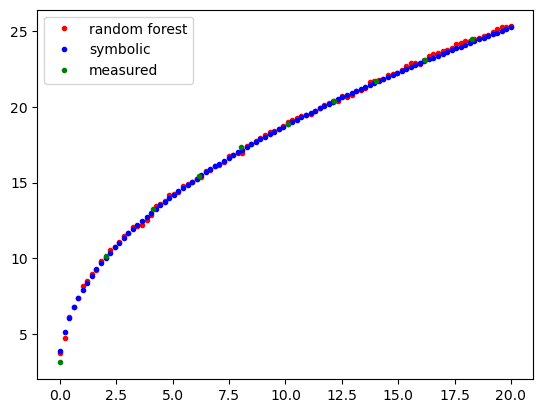

In [70]:
plt.plot(t_values, x_values, 'r.', label='random forest');
plt.plot(st_values, sx_values, 'b.', label='symbolic');
plt.plot(t[::10], x[::10], 'g.', label='measured');
plt.legend();

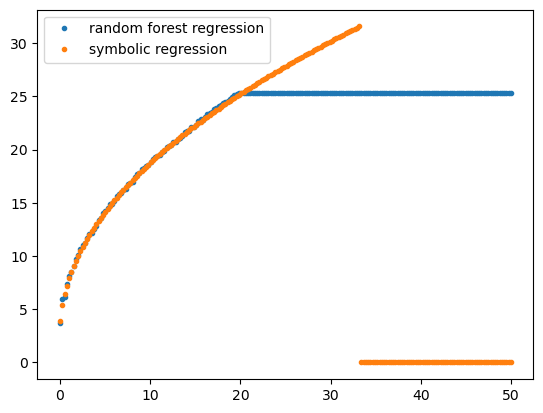

In [49]:
t_extra = np.linspace(0.0, 50.0, 200)
plt.plot(t_extra, rfr.predict(t_extra.reshape((-1, 1))), '.', label='random forest regression');
plt.plot(t_extra, sr.predict(t_extra.reshape((-1, 1))), '.', label='symbolic regression')
plt.legend();